<a href="https://colab.research.google.com/github/PhanTheMinhChau/YOLOv5/blob/main/use_pt_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import torch
from PIL import Image
import requests
from io import BytesIO

model = torch.hub.load('ultralytics/yolov5', 'custom', path='./doremon.pt') 
model.conf = 0.45  # confidence threshold (0-1)
model.iou = 0.6

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-30 torch 1.10.0+cu111 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients
Adding AutoShape... 


In [16]:
def catch(wave_image, threshold=0.8):
    result = model(wave_image, size = 800)
    np_rs = result.xywh[0].cpu()
    print(np_rs)
    #Get Position
    rs = [(np.int(r[0]) , np.int(r[1])) for r in np_rs]
    return rs

In [18]:
img = Image.open("2O39J3NRIBF18RX.png")
response1 = requests.get("https://upload.wikimedia.org/wikipedia/commons/0/0e/Basic_red_dot.png")
#img1 = Image.open(BytesIO(response1.content)).resize([10,10])
de = catch(img)
print(de)

tensor([[300.67416, 161.46634,  70.70898,  71.20039,   0.98795,   2.00000],
        [262.94122, 312.00195,  51.74820,  52.32028,   0.98645,   2.00000],
        [ 54.72261, 264.29443,  82.83530,  88.69240,   0.91650,   1.00000],
        [ 45.75314, 330.95203,  90.89201,  88.98026,   0.78322,   4.00000]])
[(300, 161), (262, 312), (54, 264), (45, 330)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


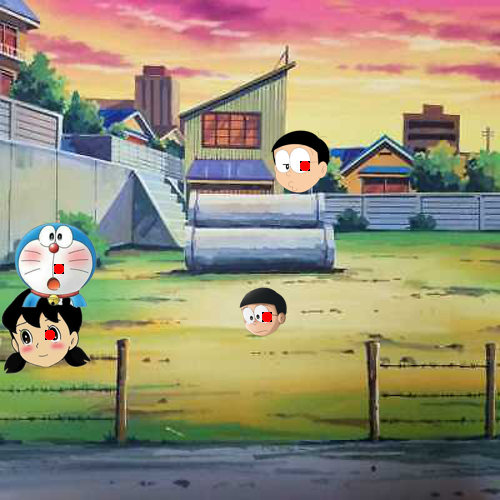

In [19]:
for i in de:
  Image.Image.paste(img, img1, i)
img